## Linear Regression from Scratch

This notebook demonstrates a from-scratch implementation of simple linear regression using NumPy. It predicts **Salary** from **Years of Experience**, illustrating fundamental ML concepts such as data normalization and gradient descent.

#### Problem Statement
> Given a salary dataset with years of experience and the corresponding salary,  
> use an ML model to predict the **salary of new employees** based on different years of experience.

---

#### Dataset Overview
We use a simple dataset `Salary_Data.csv` containing:
- `YearsExperience` — number of years of professional experience  
- `Salary` — annual salary in USD  

This dataset helps visualize how a linear model fits the relationship between experience and salary.

---

##### Sample of the dataset
| YearsExperience | Salary |
|------------------|--------|
| 1.1              | 39343  |
| 1.5              | 46205  |
| 2.0              | 37731  |
| 3.2              | 57081  |
| 4.0              | 56957  |

---

#### Goal
Implement linear regression **from scratch** using NumPy:
1. Calculate gradients manually  
2. Perform gradient descent  
3. Visualize training progress and final regression line


#### 1: Import Required Libraries

Import essential Python libraries for numerical computation, data manipulation, and visualization.

In [1]:
## Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

#### 2. Load Dataset

Load the salary dataset containing years of experience and corresponding salary values.

In [2]:
## Loading the dataset

ds = pd.read_csv("../data/Salary_Data.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values
print("Dataset shape:", ds.shape)
ds.head()

Dataset shape: (30, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [4]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

#### 3: Visualize the Dataset

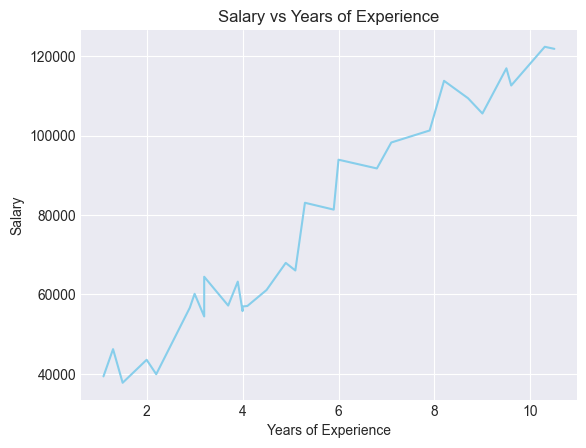

In [6]:
plt.plot(X, Y, color='skyblue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

In [7]:
## Making them numpy arrays to make it easier to work with

X = np.array(X)
Y = np.array(Y)

#### 4. Util functions for Linear regression class

Define utility functions to compute mean, variance, and normalization for feature scaling.

In [8]:
def mean(X):
    return np.sum(X)/len(X)

In [9]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [10]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X - mean_value)/np.sqrt(variance_value)

In [11]:
# Normalizing X

X_norm = norm(X)

In [12]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

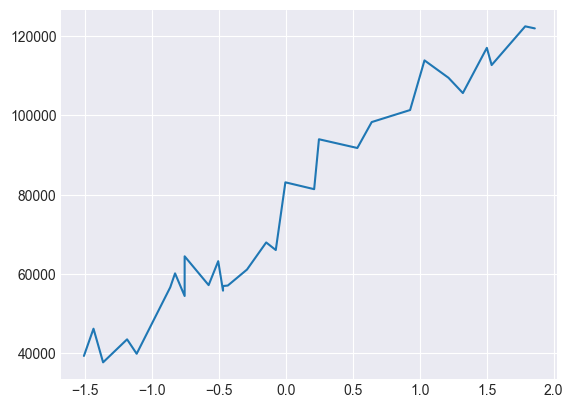

In [13]:
plt.plot(X_norm,Y)

In [14]:
import random

#### 5. Linear Regression core class

Implements the Linear Regression algorithm from scratch — including initialization, training using gradient descent, prediction, and visualization

In [15]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self, X):
        return self.weight*X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

6. Instantiate the Simple Linear Regression model with initial parameters.

In [16]:
model = SimpleLR()

7. Train the model and record loss across iterations to monitor convergence.

In [18]:
loss_history = model.fit(X_norm, Y)

In [19]:
loss_history

[np.float64(3251407968.6498494),
 np.float64(2636611195.019995),
 np.float64(2138625808.379812),
 np.float64(1735257645.2012644),
 np.float64(1408529433.0266411),
 np.float64(1143879581.165196),
 np.float64(929513201.1574255),
 np.float64(755876433.3511312),
 np.float64(615230651.4280329),
 np.float64(501307568.0703234),
 np.float64(409029870.5505785),
 np.float64(334284935.55958533),
 np.float64(273741538.21688074),
 np.float64(224701386.36929008),
 np.float64(184978863.37274173),
 np.float64(152803619.7455374),
 np.float64(126741672.407502),
 np.float64(105631495.0636933),
 np.float64(88532251.41520822),
 np.float64(74681864.05993532),
 np.float64(63463050.3021643),
 np.float64(54375811.1583698),
 np.float64(47015147.45189618),
 np.float64(41053009.84965263),
 np.float64(36223678.39183527),
 np.float64(32311919.9110033),
 np.float64(29143395.541529376),
 np.float64(26576890.802255455),
 np.float64(24498021.963443585),
 np.float64(22814138.204006013),
 np.float64(21450192.358861584),


8. Plot the loss history to see how we reach the well fit model

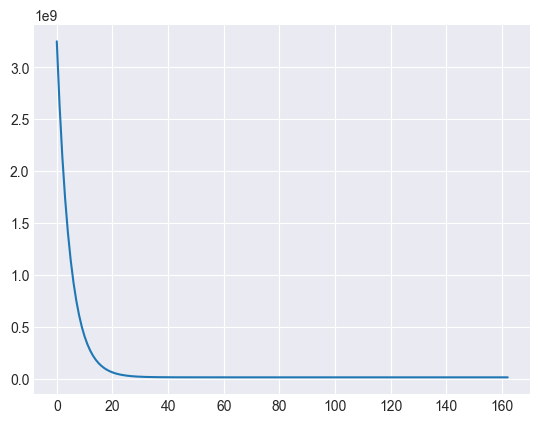

In [20]:
plt.plot(loss_history)

#### 9. Model Evaluation

Plot predicted regression line over the actual data to visually assess performance.

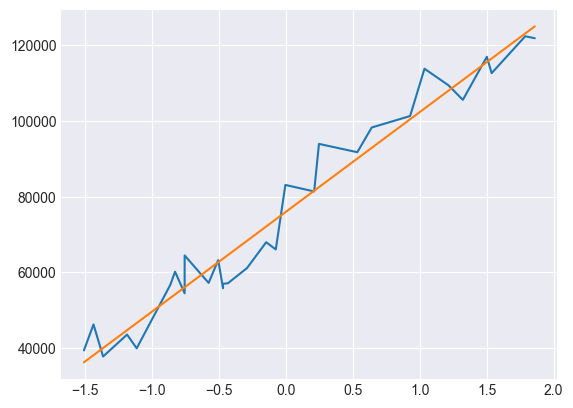

In [21]:
model.plot(X_norm,Y)

#### 10. Conclusion

This project presents a clean implementation of linear regression from scratch using Salary_Data.csv and the dataset